In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [9]:
# combining Item_Fat_Content misspelled
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [10]:
# creating new column num_years
train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 

In [11]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
test_data['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

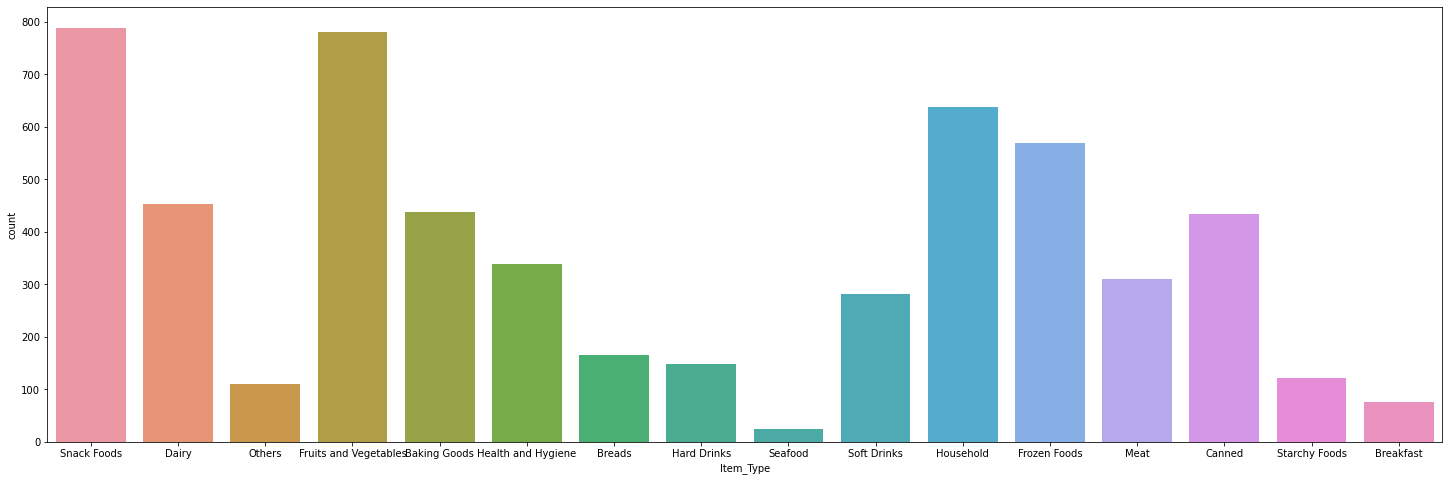

In [13]:
# Item_Type column
plt.figure(figsize=(25,8))
sns.countplot(x='Item_Type', data=test_data)
plt.show()

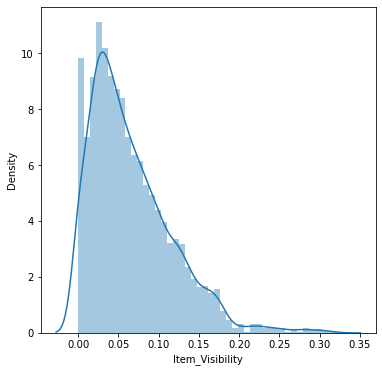

In [14]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(test_data['Item_Visibility'])
plt.show()

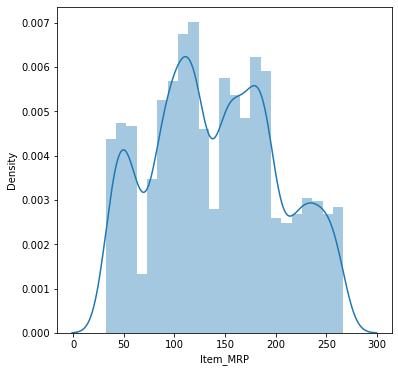

In [15]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(test_data['Item_MRP'])
plt.show()

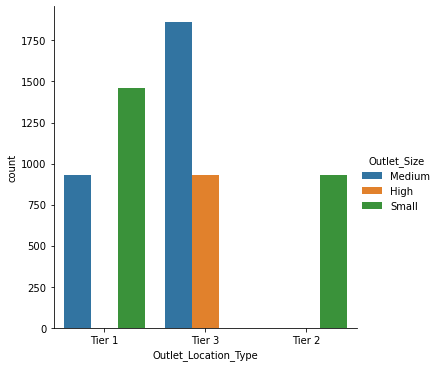

In [16]:
sns.factorplot('Outlet_Location_Type',data = train_data,hue ='Outlet_Size' ,kind='count')

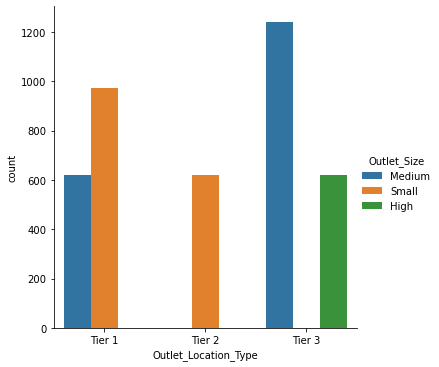

In [17]:
sns.factorplot('Outlet_Location_Type',data = test_data,hue ='Outlet_Size' ,kind='count')

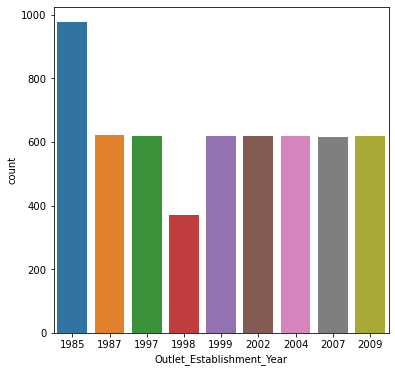

In [18]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=test_data)
plt.show()

In [19]:
full_data = [train_data, test_data]

In [20]:
# filling null values
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True) 

In [21]:
data['Item_Weight'].mean()

12.695633368756402

In [22]:
data['Outlet_Size'].mode()

0    Medium
dtype: object

In [23]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [24]:
print(col)

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [25]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,num_years
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903,15.171097
std,4.245189,0.051252,61.809091,8.372256,8.372256
min,4.555000,0.000000,31.990000,1985.000000,4.000000
25%,9.195000,0.027047,94.412000,1987.000000,9.000000
50%,12.695633,0.054154,141.415400,1999.000000,14.000000
75%,15.850000,0.093463,186.026600,2004.000000,26.000000
max,21.350000,0.323637,266.588400,2009.000000,28.000000


In [26]:
# handling catagorical variables
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)

In [27]:
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'num_years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [28]:
X = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']

In [29]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state =22)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 27) (6818, 27) (1705, 27)


### Create Model

In [31]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [32]:
algos = [ LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K Neighbors Regression', 'Decision Tree Regression']
rmse_list = []

In [43]:
print(rmse_list)

[1111.4558550355407, 1111.4863562117034, 1112.6405719591883, 0.0, 1020.8203171775441]


In [34]:
for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    MSE = metrics.mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse) 

In [35]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [36]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Data Evaluation

In [37]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)                       

In [38]:
print('R Squared value = ', r2_train)

R Squared value =  0.8547390483570877


In [39]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [40]:
print('R Squared value = ', r2_test)

R Squared value =  0.5056320724675876


In [41]:
# Create a DateFrame:
models = pd.DataFrame({'Model': names, 'RMSE': rmse_list})
models

,Model,RMSE
0,Linear Regression,1111.455855
1,Ridge Regression,1111.486356
2,Lasso Regression,1112.640572
3,K Neighbors Regression,0.000000
4,Decision Tree Regression,1020.820317


In [42]:
# Save the model:
import pickle
filename = 'Big Data Mart Sales'
pickle.dump(models, open(filename, 'wb'))